Data analysis of service request (311) calls from New York City


TASKS TO BE PERFORMED

1. Understand the dataset:

    a.Identify the shape of the dataset

    b.Identify variables with null values

2. Perform basic data exploratory analysis:

    a.Utilize missing value treatment

    b.Analyze the date column and remove the entries if it has an incorrect timeline

    c.Draw a frequency plot for city-wise complaints

    d.Draw scatter and hexbin plots for complaint concentration across Brooklyn

3. Find major types of complaints:

    a.Plot a bar graph of count vs. complaint types

    b.Find the top 10 types of complaints

    c.Display the types of complaints in each city in a separate dataset

4. Visualize the major types of complaints in each city

5. Check if the average response time across various types of complaints

6. Identify significant variables by performing a statistical analysis using p-values and chi-square values (Optional)

Understanding the dataset

In this step we will try to know about the DATA SET using shape, info, describe, head, dtypes, unique and isna functions. Along with it, we will drop columns with insufficient data and irrevalent columns with respect to tasks required to be performed in this project.

In [1]:
#importing required libraies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#importing the dataset
df=pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head(5)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [4]:
#to know the shape of the DATA SET
df.shape

(364558, 53)

OBSERVATION: The Data Set has 364558 rows and 53 columns.

In [5]:
df.info

<bound method DataFrame.info of         Unique Key            Created Date             Closed Date Agency  \
0         32310363  12/31/2015 11:59:45 PM  01/01/2016 12:55:15 AM   NYPD   
1         32309934  12/31/2015 11:59:44 PM  01/01/2016 01:26:57 AM   NYPD   
2         32309159  12/31/2015 11:59:29 PM  01/01/2016 04:51:03 AM   NYPD   
3         32305098  12/31/2015 11:57:46 PM  01/01/2016 07:43:13 AM   NYPD   
4         32306529  12/31/2015 11:56:58 PM  01/01/2016 03:24:42 AM   NYPD   
...            ...                     ...                     ...    ...   
364553    29609918  01/01/2015 12:04:44 AM  01/01/2015 10:22:31 AM   NYPD   
364554    29608392  01/01/2015 12:04:28 AM  01/01/2015 02:25:02 AM   NYPD   
364555    29607589  01/01/2015 12:01:30 AM  01/01/2015 12:20:33 AM   NYPD   
364556    29610889  01/01/2015 12:01:29 AM  01/01/2015 02:42:22 AM   NYPD   
364557    29611816  01/01/2015 12:00:50 AM  01/01/2015 02:47:50 AM   NYPD   

                            Agency Name    

In [6]:
df.describe()

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Garage Lot Name,Latitude,Longitude
count,3.645580e+05,361560.000000,3.605280e+05,360528.000000,0.0,0.0,0.0,0.0,0.0,360528.000000,360528.000000
mean,3.106595e+07,10858.496659,1.005043e+06,203425.305782,NaN,NaN,NaN,NaN,NaN,40.724980,-73.924946
std,7.331531e+05,578.263114,2.196362e+04,29842.192857,NaN,NaN,NaN,NaN,NaN,0.081907,0.079213
min,2.960737e+07,83.000000,9.133570e+05,121185.000000,NaN,NaN,NaN,NaN,NaN,40.499040,-74.254937
25%,3.049938e+07,10314.000000,9.919460e+05,182945.000000,NaN,NaN,NaN,NaN,NaN,40.668742,-73.972253
50%,3.108795e+07,11209.000000,1.003470e+06,201023.000000,NaN,NaN,NaN,NaN,NaN,40.718406,-73.930643
75%,3.167433e+07,11238.000000,1.019134e+06,222790.000000,NaN,NaN,NaN,NaN,NaN,40.778166,-73.874098
max,3.231065e+07,11697.000000,1.067186e+06,271876.000000,NaN,NaN,NaN,NaN,NaN,40.912869,-73.700715


In [7]:
df.isna().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

In [8]:
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [9]:
#Dropping columns with Insufficient data

In [10]:
df.drop(['Intersection Street 1', 'Intersection Street 2', 'Landmark', 'School or Citywide Complaint', 'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment', 'Garage Lot Name', 'Ferry Direction', 'Ferry Terminal Name'],axis=1,inplace=True)

In [11]:
df.shape

(364558, 39)

In [12]:
df.isna().sum()

Unique Key                            0
Created Date                          0
Closed Date                        2381
Agency                                0
Agency Name                           0
Complaint Type                        0
Descriptor                         6501
Location Type                       133
Incident Zip                       2998
Incident Address                  51699
Street Name                       51699
Cross Street 1                    57188
Cross Street 2                    57805
Address Type                       3252
City                               2997
Facility Type                      2389
Status                                0
Due Date                              3
Resolution Description                0
Resolution Action Updated Date     2402
Community Board                       0
Borough                               0
X Coordinate (State Plane)         4030
Y Coordinate (State Plane)         4030
Park Facility Name                    0


In [13]:
#with respect to the tasks asked to perform, some of the columns are irrelevant for analysis. Hence, we will drop those columns in the folloiwng steps.
df.drop(['Status', 'Due Date', 'Resolution Description', 'Resolution Action Updated Date', 'Community Board', 'Borough', 'Park Facility Name', 'Park Borough', 'School Name', 'School Number', 'School Region', 'School Code', 'School Phone Number', 'School Address', 'School City', 'School State', 'School Zip', 'School Not Found', 'Latitude', 'Longitude'],axis=1,inplace=True)


In [14]:
df.shape

(364558, 19)

In [15]:
df.drop(['Unique Key', 'Agency', 'Agency Name', 'Descriptor', 'Location Type', 'Cross Street 1', 'Street Name', 'Address Type', 'Cross Street 2', 'Facility Type'],axis=1,inplace=True)


In [16]:
df.drop(['X Coordinate (State Plane)', 'Y Coordinate (State Plane)'],axis=1,inplace=True)
df.head(2)

,Created Date,Closed Date,Complaint Type,Incident Zip,Incident Address,City,Location
0,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,Noise - Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,NEW YORK,"(40.86568153633767, -73.92350095571744)"
1,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,Blocked Driveway,11105.0,27-07 23 AVENUE,ASTORIA,"(40.775945312321085, -73.91509393898605)"


In [17]:
df.isna().sum()

Created Date            0
Closed Date          2381
Complaint Type          0
Incident Zip         2998
Incident Address    51699
City                 2997
Location             4030
dtype: int64

NULL VALUE TREATMENT:

The following data shows the columns required for analysis and number of null values in the columns respectively.

Created Date            0
Closed Date          2381
Complaint Type          0
Incident Zip         2998
Incident Address    51699
City                 2997
Location             4030

The number of null vales in each columns is very less when compared to the total entries in the those columns(Incident Address column has 7 percent null values and Incident Zip, Location, City, Closed Date have less than 1 percent null values). Therefdore, we will drop the rows with null vales in these columns and take the remanining rows in this columns for analysis.

In [18]:
#Dropping null values
df.dropna(inplace=True)

In [19]:
df.isna().sum()

Created Date        0
Closed Date         0
Complaint Type      0
Incident Zip        0
Incident Address    0
City                0
Location            0
dtype: int64

In [20]:
df.shape

(308777, 7)

OBSERVATION: 

Shape of the dataset after dropping Null values, insufficient data columns and irrelavant columns: 

Number of Rows:308777
Number of Columns:7

In [21]:
#Analyzing the date column and remove the entries if it has an incorrect timeline

In [22]:
df_CityWise_ComplaintCount=df[['City', 'Complaint Type']].groupby(['City']).size().reset_index()
df_CityWise_ComplaintCount

,City,0
0,ARVERNE,217
1,ASTORIA,7095
2,Astoria,905
3,BAYSIDE,1272
4,BELLEROSE,398
5,BREEZY POINT,29
6,BRONX,42914
7,BROOKLYN,104668
8,CAMBRIA HEIGHTS,507
9,CENTRAL PARK,94


In [23]:
df_CityWise_ComplaintCount.rename(columns={'Complaint Count':'City',0:'Count'},inplace=True)
df_CityWise_ComplaintCount_sorted=df_CityWise_ComplaintCount.sort_values(by='Count')
df_CityWise_ComplaintCount_sorted

,City,Count
23,Howard Beach,1
5,BREEZY POINT,29
14,East Elmhurst,30
9,CENTRAL PARK,94
32,NEW HYDE PARK,111
51,Woodside,166
16,FLORAL PARK,168
29,Long Island City,170
0,ARVERNE,217
20,GLEN OAKS,279


Text(0.5, 1.0, 'NUMBER OF COMPLAINTS ACROSS EACH CITIES')

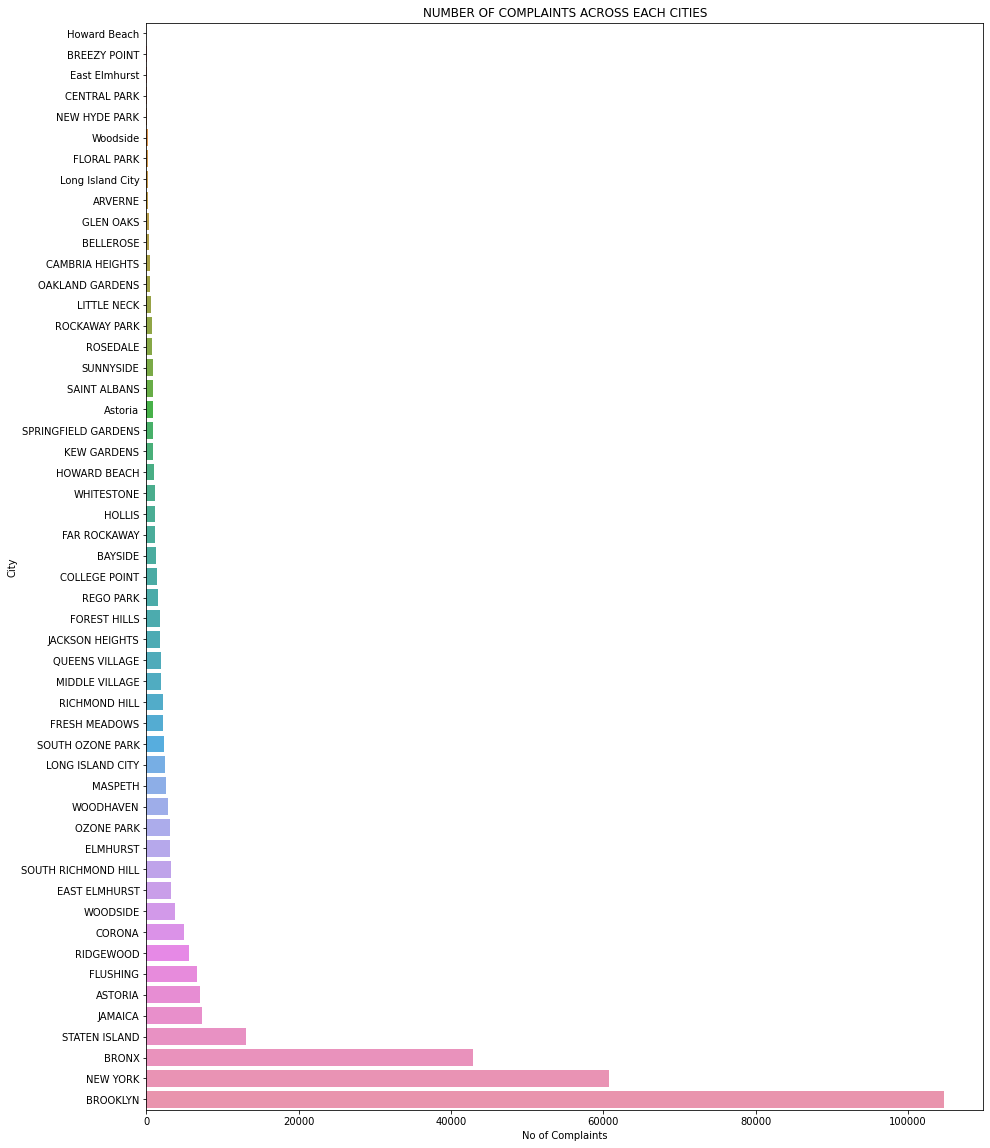

In [24]:
plt.figure(figsize = (15, 20))
sns.barplot(x=df_CityWise_ComplaintCount_sorted['Count'], y=df_CityWise_ComplaintCount_sorted['City'])
plt.xlabel("No of Complaints")
plt.ylabel("City")
plt.title("NUMBER OF COMPLAINTS ACROSS EACH CITIES")


In [26]:
df_Brooklyn=df[df['City']=='BROOKLYN']
df_Brooklyn

,Created Date,Closed Date,Complaint Type,Incident Zip,Incident Address,City,Location
5,12/31/2015 11:56:30 PM,01/01/2016 01:50:11 AM,Illegal Parking,11215.0,260 21 STREET,BROOKLYN,"(40.66082272389114, -73.99256786342693)"
9,12/31/2015 11:53:58 PM,01/01/2016 01:17:40 AM,Blocked Driveway,11219.0,1408 66 STREET,BROOKLYN,"(40.623793065806524, -73.99953890121567)"
13,12/31/2015 11:47:58 PM,01/01/2016 08:18:47 AM,Illegal Parking,11208.0,38 COX PLACE,BROOKLYN,"(40.68751060232221, -73.87450451131276)"
17,12/31/2015 11:44:52 PM,01/01/2016 12:36:10 AM,Noise - Commercial,11217.0,622 DEGRAW STREET,BROOKLYN,"(40.679154133157326, -73.98342992763081)"
18,12/31/2015 11:40:59 PM,01/01/2016 02:37:28 AM,Noise - Commercial,11234.0,2192 FLATBUSH AVENUE,BROOKLYN,"(40.61655032892211, -73.93020153359745)"
...,...,...,...,...,...,...,...
364539,01/01/2015 12:23:55 AM,01/01/2015 02:58:38 AM,Blocked Driveway,11201.0,229 DUFFIELD STREET,BROOKLYN,"(40.69124772858873, -73.98437529459297)"
364541,01/01/2015 12:19:22 AM,01/01/2015 02:41:10 AM,Blocked Driveway,11211.0,27 HOPE STREET,BROOKLYN,"(40.71361332917013, -73.95696623841229)"
364544,01/01/2015 12:17:48 AM,01/01/2015 03:24:48 AM,Noise - Commercial,11217.0,242 FLATBUSH AVENUE,BROOKLYN,"(40.68035202521423, -73.97476587888686)"
364545,01/01/2015 12:17:47 AM,01/01/2015 12:51:13 AM,Blocked Driveway,11237.0,1373 DECATUR STREET,BROOKLYN,"(40.692383519190834, -73.90401080101479)"


In [28]:
df_ZipWise_ComplaintCount=df_Brooklyn[['Incident Zip', 'Complaint Type']].groupby(['Incident Zip']).size().reset_index()
df_ZipWise_ComplaintCount

,Incident Zip,0
0,11201.0,1967
1,11203.0,2883
2,11204.0,3053
3,11205.0,2474
4,11206.0,3956
5,11207.0,3183
6,11208.0,3630
7,11209.0,3352
8,11210.0,2274
9,11211.0,4230


In [29]:
df_ZipWise_ComplaintCount.rename(columns={0:'Complaint Count'},inplace=True)
df_ZipWise_ComplaintCount

,Incident Zip,Complaint Count
0,11201.0,1967
1,11203.0,2883
2,11204.0,3053
3,11205.0,2474
4,11206.0,3956
5,11207.0,3183
6,11208.0,3630
7,11209.0,3352
8,11210.0,2274
9,11211.0,4230


Text(0, 0.5, 'Incident Zip')

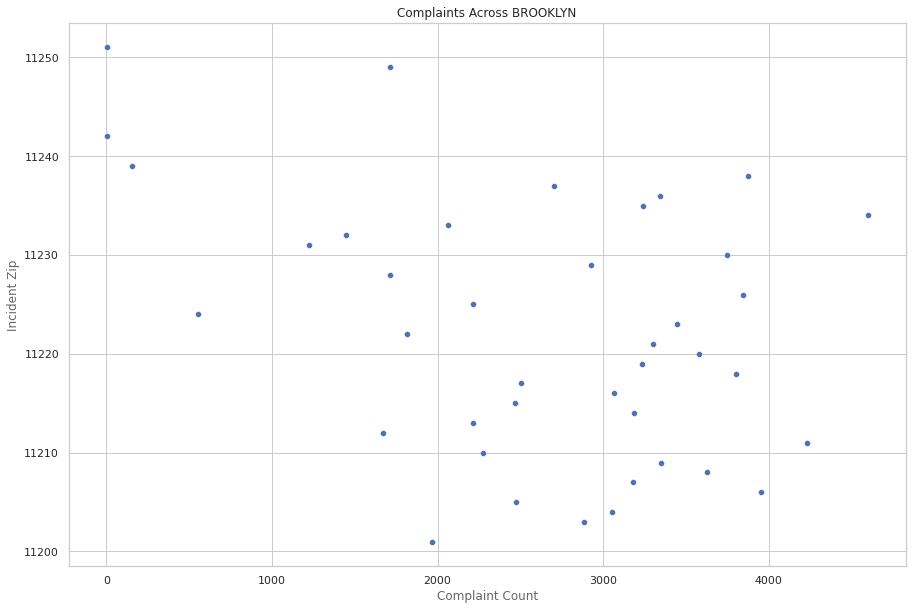

In [30]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(15, 10))
sns.scatterplot(data=df_ZipWise_ComplaintCount, x="Complaint Count", y="Incident Zip", legend=False, sizes=(20, 2000), ax=ax)
ax.set_title('Complaints Across BROOKLYN')
ax.set_xlabel("Complaint Count", alpha=0.7)
ax.set_ylabel("Incident Zip", alpha=0.7)


Text(0, 0.5, 'Complaint Count')

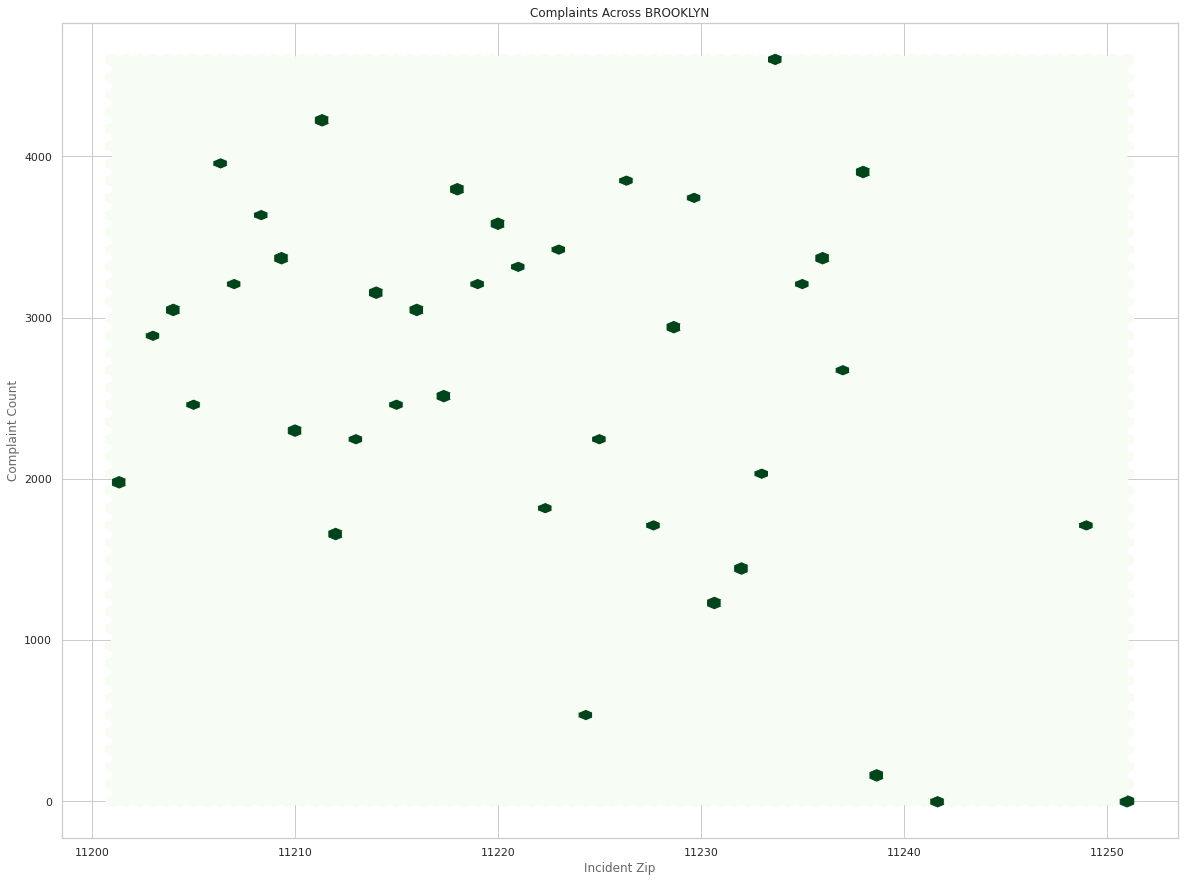

In [82]:
f, ax = plt.subplots(figsize=(20, 15))
plt.hexbin(x=df_ZipWise_ComplaintCount['Incident Zip'], y=df_ZipWise_ComplaintCount['Complaint Count'], gridsize = 75, cmap ='Greens')
ax.set_title('Complaints Across BROOKLYN')
ax.set_xlabel("Incident Zip", alpha=0.7)
ax.set_ylabel("Complaint Count", alpha=0.7)

In [44]:
df_ComplaintCount=df['Complaint Type'].value_counts()
df_ComplaintCount=df_ComplaintCount.to_frame().reset_index()
df_ComplaintCount.rename(columns={'index':'Complaint Type', 'Complaint Type':'Count'},inplace=True)
df_ComplaintCount

,Complaint Type,Count
0,Blocked Driveway,98799
1,Illegal Parking,75140
2,Noise - Street/Sidewalk,41941
3,Noise - Commercial,40274
4,Derelict Vehicle,17940
5,Noise - Vehicle,13771
6,Animal Abuse,8983
7,Homeless Encampment,3265
8,Vending,2453
9,Noise - Park,1289


Text(0.5, 1.0, 'NUMBER OF COMPLAINTS ACROSS EACH CITIES')

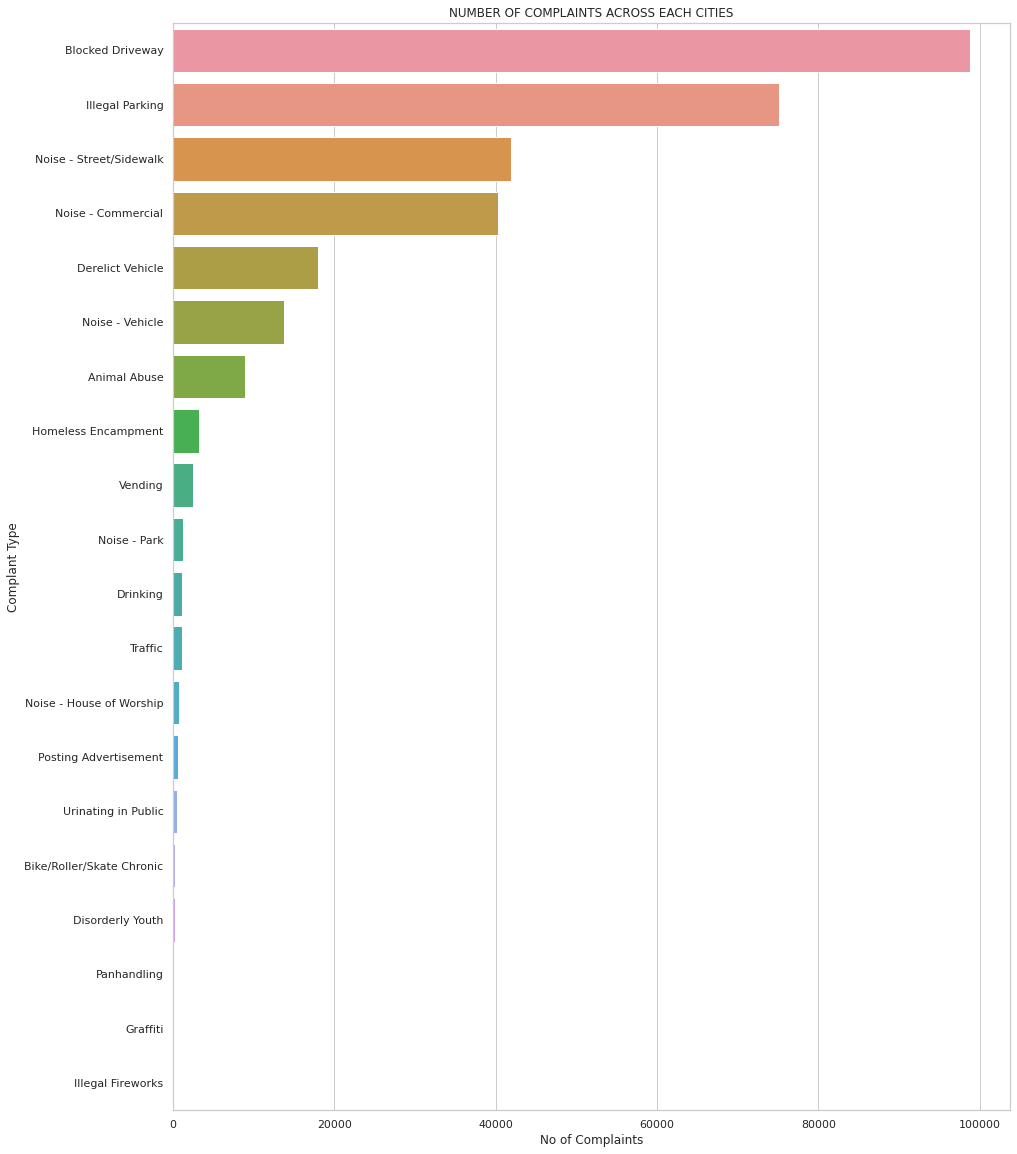

In [46]:
plt.figure(figsize = (15, 20))
sns.barplot(x=df_ComplaintCount['Count'], y=df_ComplaintCount['Complaint Type'])
plt.xlabel("No of Complaints")
plt.ylabel("Complant Type")
plt.title("NUMBER OF COMPLAINTS ACROSS EACH CITIES")

In [55]:
df__Top10_Complaints=df_ComplaintCount.head(10)
df__Top10_Complaints

,Complaint Type,Count
0,Blocked Driveway,98799
1,Illegal Parking,75140
2,Noise - Street/Sidewalk,41941
3,Noise - Commercial,40274
4,Derelict Vehicle,17940
5,Noise - Vehicle,13771
6,Animal Abuse,8983
7,Homeless Encampment,3265
8,Vending,2453
9,Noise - Park,1289


In [70]:
#Types of Complaints in each city



In [73]:
df['Created Date']=pd.to_datetime(df['Created Date'])
df['Closed Date']=pd.to_datetime(df['Closed Date'])
df['Response Time']= df['Closed Date']-df['Created Date']

In [76]:
df_ResponceTime_AcrossComplaints = df[['Complaint Type','Response Time']]
df_ResponceTime_AcrossComplaints['Response Time in Hours']=np.around( (df_ResponceTime_AcrossComplaints['Response Time'].astype(np.int64)/
                                                      (pow(10,9)*3600) ), decimals=2)
df_ResponceTime_AcrossComplaints

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Complaint Type,Response Time,Response Time in Hours
0,Noise - Street/Sidewalk,0 days 00:55:30,0.92
1,Blocked Driveway,0 days 01:27:13,1.45
2,Blocked Driveway,0 days 04:51:34,4.86
3,Illegal Parking,0 days 07:45:27,7.76
4,Illegal Parking,0 days 03:27:44,3.46
...,...,...,...
364553,Illegal Parking,0 days 10:17:47,10.30
364554,Noise - Vehicle,0 days 02:20:34,2.34
364555,Noise - Street/Sidewalk,0 days 00:19:03,0.32
364556,Blocked Driveway,0 days 02:40:53,2.68


In [79]:
#AVERAGE RESPONSE TIME ACROSS VARIOUS COMPLAINT TYPES
df_Ave_Res_Time=df_ResponceTime_AcrossComplaints[['Complaint Type','Response Time in Hours']].groupby(['Complaint Type']).mean().reset_index()
df_Ave_Res_Time.rename(columns={'Response Time in Hours':'Average Response Time'},inplace=True)
df_Ave_Res_Time

,Complaint Type,Average Response Time
0,Animal Abuse,5.124719
1,Bike/Roller/Skate Chronic,3.339573
2,Blocked Driveway,4.506658
3,Derelict Vehicle,6.928305
4,Disorderly Youth,3.504880
5,Drinking,3.822824
6,Graffiti,5.516594
7,Homeless Encampment,4.336380
8,Illegal Fireworks,3.156136
9,Illegal Parking,4.327430
